<a href="https://colab.research.google.com/github/medayoubaziz/Classification-predictions/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/Car_Insurance_Claim.csv'
file1_path = '/content/healthcare-dataset-stroke-data.csv'
car_df = pd.read_csv(file_path)
stroke_df = pd.read_csv(file1_path)

Mounted at /content/drive


In [ ]:
def explore_cat(inspection_df, x , fillna=True , placeholder='Missing' , figsize=(7,5) , order=None) :
 temp_df = inspection_df.copy()
 null_count = temp_df[x].isna().sum()
 null_per = null_count * 100 / len(temp_df)
 if fillna == True :
  temp_df[x].fillna(placeholder , inplace = True)
 fig,ax = plt.subplots(figsize=figsize)
 sns.countplot(data=temp_df , x=x , ax=ax , order=order)
 ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12 , rotation = 45 , ha = 'right')
 ax.set_title(f'column : {x}' , fontweight = 'bold' , fontsize = 15)
 sns.despine()
 fig.tight_layout()
 plt.show()
 print(f'There is {null_count} NaN ({round(null_per,2)}%)')
 nunique = temp_df[x].nunique()
 print(f'There is {nunique} unique values')
 most_common_value = temp_df[x].value_counts(dropna=False).index[0]
 freq = temp_df[x].value_counts(dropna=False).values[0]
 per_common_value = freq * 100 / len(temp_df)
 print(f'The most common value is {most_common_value} , occurs {freq} times ({round(per_common_value,2)}%)')
 if per_common_value > 98 :
  print(f'{x}: is a constant or quasi-constant feature and should be dropped')
 else :
  print(f'{x}: is neither constant or a quasi-constant feauture and should be kept')
 return fig,ax

def plot_cat_vs_target(inspection_df , x , y='rating' , placeholder='Missing' , order=None , figsize=(7,5) , fillna = True):
 temp_df = inspection_df.copy()
 if fillna == True:
  temp_df[x].fillna(placeholder, inplace=True)
 else:
  temp_df = temp_df.dropna(subset=[x])
 fig,ax = plt.subplots(figsize=figsize)
 sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)
 sns.stripplot(data=temp_df, x=x , y=y , hue=x , ax=ax , order=order, hue_order=order, legend=False , edgecolor='white', linewidth=0.5,
 size=3,zorder=0)
 ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right' , fontsize = 12)
 ax.set_title(f"{x} vs. {y}", fontweight='bold' , fontsize=15)
 fig.tight_layout()
 plt.show()
 return fig, ax


In [ ]:
def explore_num(inspection_df , x , figsize=(7.5)) :
 temp_df = inspection_df.copy()
 null_count = temp_df[x].isna().sum()
 null_per = null_count * 100 / len(temp_df)
 nunique = temp_df[x].nunique()
 most_common_value = temp_df[x].value_counts(dropna=False).index[0]
 freq = temp_df[x].value_counts(dropna=False).values[0]
 per_common_value = freq * 100 / len(temp_df)
 gridspec = {'height_ratios':[0.7,0.3]}
 fig,ax = plt.subplots(nrows=2 , figsize=figsize , sharex=True , gridspec_kw=gridspec)
 sns.histplot(data=temp_df , x=x , ax= ax[0])
 sns.boxplot(data=temp_df , x=x , ax=ax[1])
 ax[0].set_title(f"Column: {x}", fontweight='bold' , fontsize = 15)
 sns.despine()
 fig.tight_layout()
 plt.show()
 print(f'There is {null_count} NaN ({round(null_per,2)}%)')
 print(f'There is {nunique} unique values')
 print(f'The most common value is {most_common_value} , occurs {freq} times ({round(per_common_value,2)}%)')
 if per_common_value > 98 :
  print(f'{x}: is a constant or quasi-constant feature and should be dropped')
 else :
  print(f'{x}: is neither constant or a quasi-constant feauture and should be kept')
 return fig,ax

def plot_num_vs_target(inspection_df ,x,y='rating' , figsize=(7,5)):
  temp_df = inspection_df.copy()
  corr = temp_df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.7}
  sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  fig.tight_layout()
  plt.show()
  return fig, ax


In [ ]:
car_df.info()
car_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


#1. Source of data

https://www.kaggle.com/

#2. Brief description of data

The data has 19 features from there 18 of them are corresponding logs which were taken by the company  to find out the real customer behaviors .

#3. What is the target?

Our target is the column : OUTCOME.

#4. What does one row represent? (A person? A business? An event? A product?)

Each row represent a person with a car .

#5. Is this a classification or regression problem?

This is a classification problem .

#6. How many features does the data have?

There is 18 feautres except our target .

#7. How many rows are in the dataset?

1000 rows .

#8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

I'm going to check for duplicated rows and the null values/missing data and explore them and then i'm going to check the balance of our target so it can help me with my model.

In [ ]:
car_df.duplicated().sum()

0

In [ ]:
car_df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<Axes: >

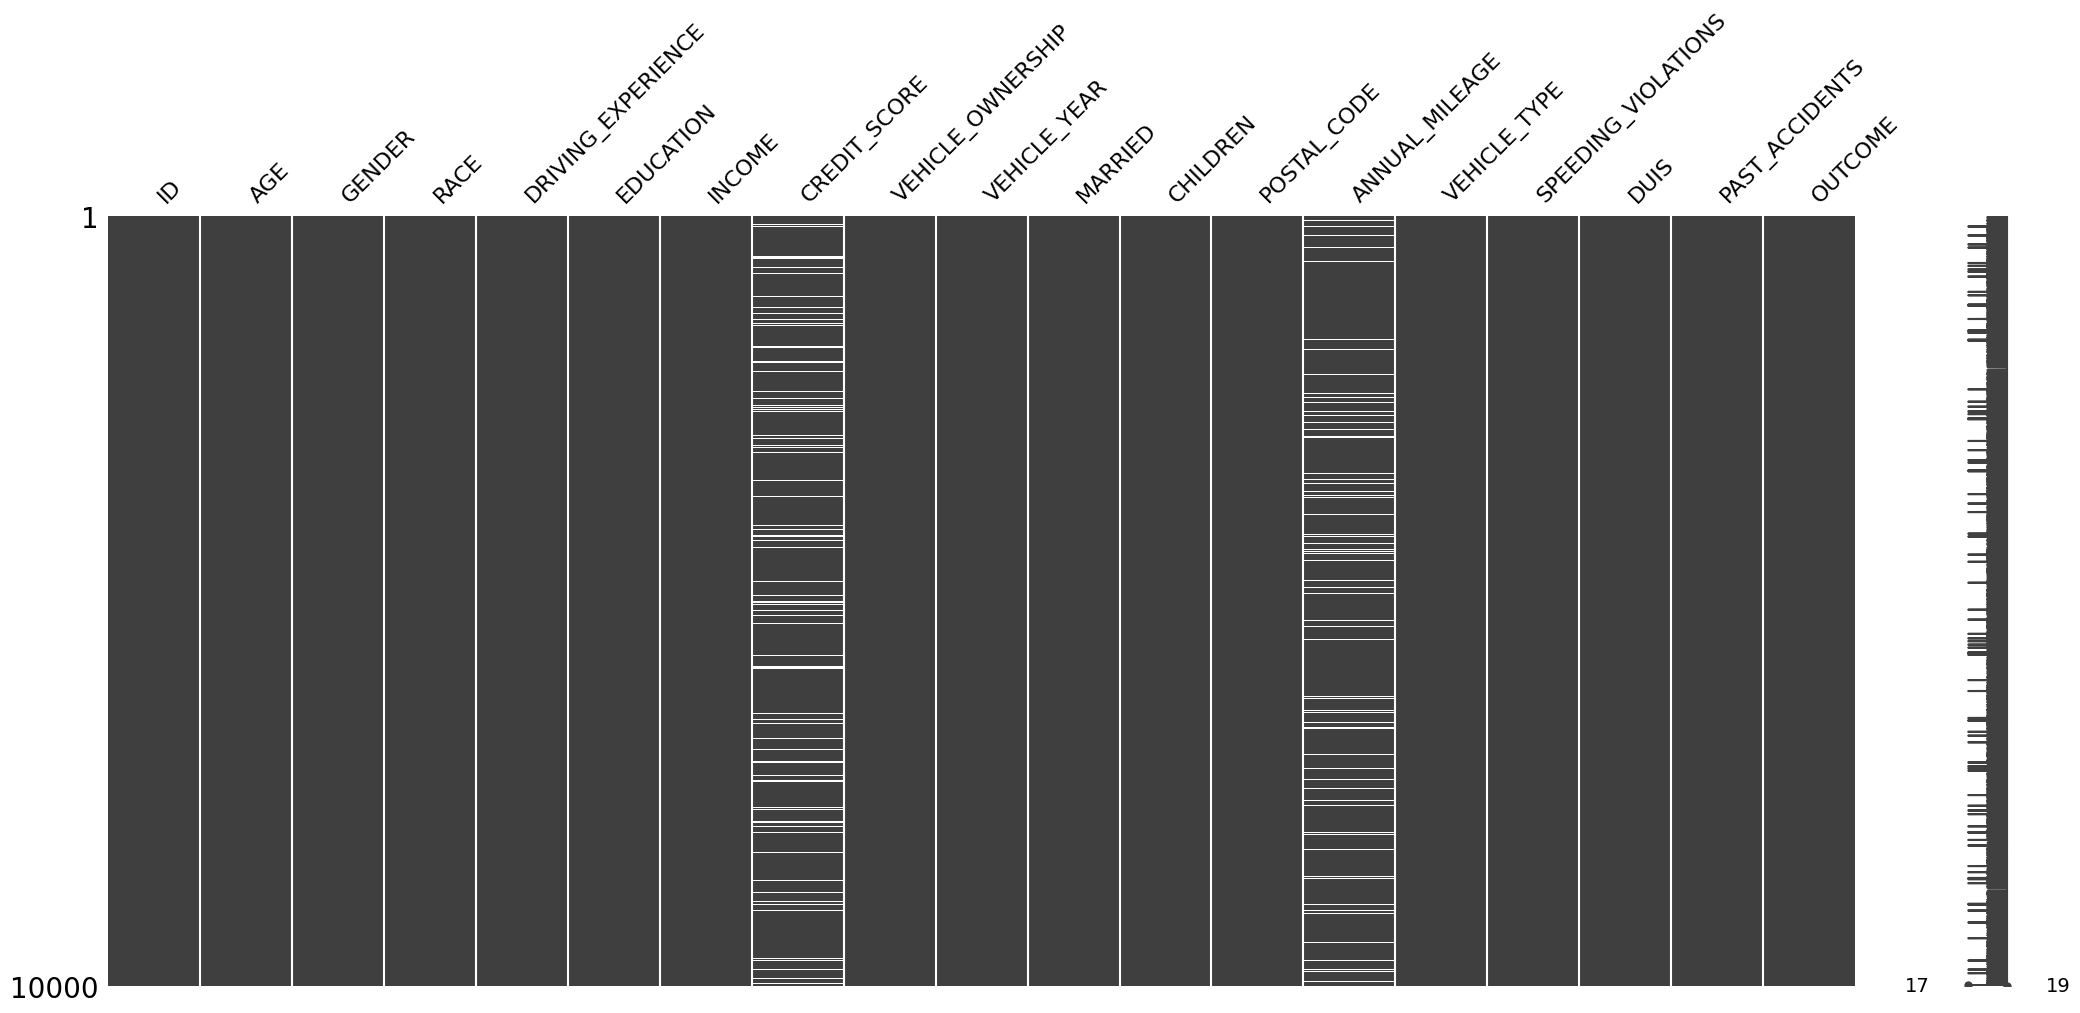

In [ ]:
import missingno as msno
msno.matrix(car_df)

As we can see , there are two features with missing data : CREDIT_SCORE and ANNUAL_MILEAGE , the other features and the target dosen't have missig values .

In [ ]:
car_df['ID'].value_counts().sum()/len(car_df)

1.0

In [ ]:
#let's change the index of our data
car_df = car_df.set_index('ID')
car_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
 car_df.select_dtypes('number').columns


Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

##Target column

In [ ]:
car_df['OUTCOME'].value_counts(normalize=True)

0.0    0.6867
1.0    0.3133
Name: OUTCOME, dtype: float64

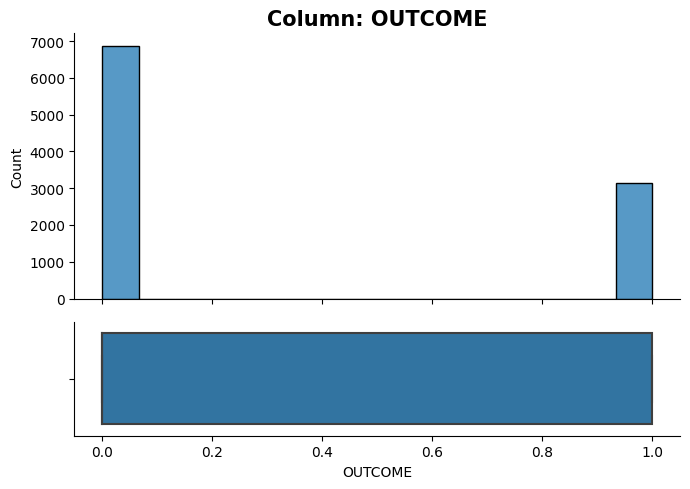

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 0.0 , occurs 6867 times (68.67%)
OUTCOME: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'OUTCOME',figsize=(7,5));

##CREDIT_SCORE column

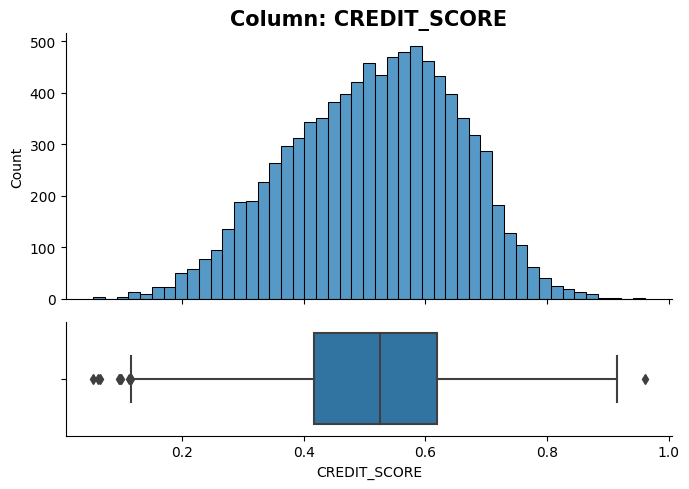

There is 982 NaN (9.82%)
There is 9018 unique values
The most common value is nan , occurs 982 times (9.82%)
CREDIT_SCORE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'CREDIT_SCORE',figsize=(7,5));

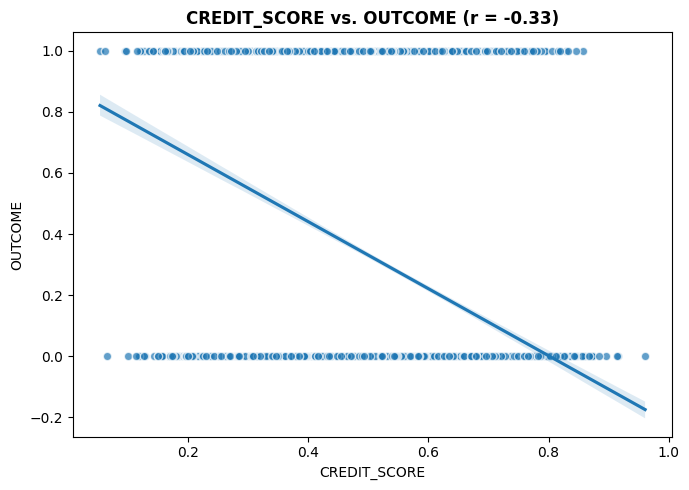

In [ ]:
target = 'OUTCOME'
plot_num_vs_target(car_df,x='CREDIT_SCORE',y=target);

CREDIT_SCORE is a numerical feature with 9.82% of missing values , for the imputation i'm going to use median as a strategy.

##VEHICLE_OWNERSHIP column

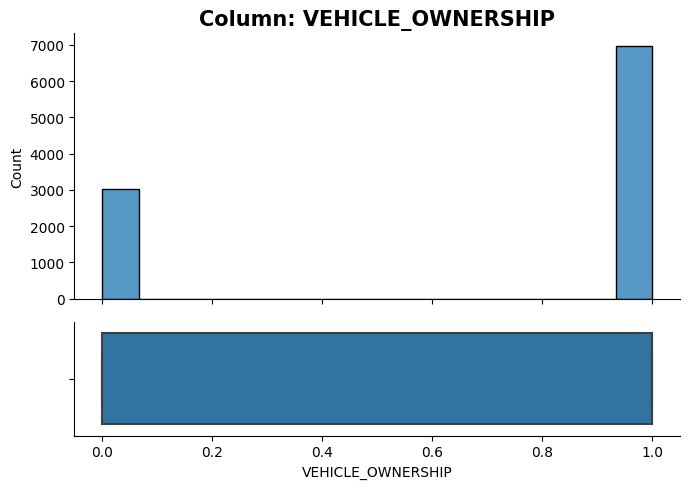

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 1.0 , occurs 6970 times (69.7%)
VEHICLE_OWNERSHIP: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'VEHICLE_OWNERSHIP',figsize=(7,5));

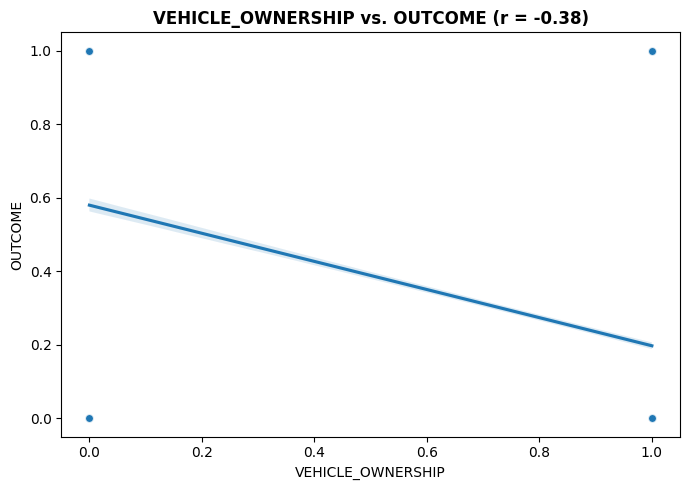

In [ ]:
plot_num_vs_target(car_df,'VEHICLE_OWNERSHIP',y=target);

##MARRIED column

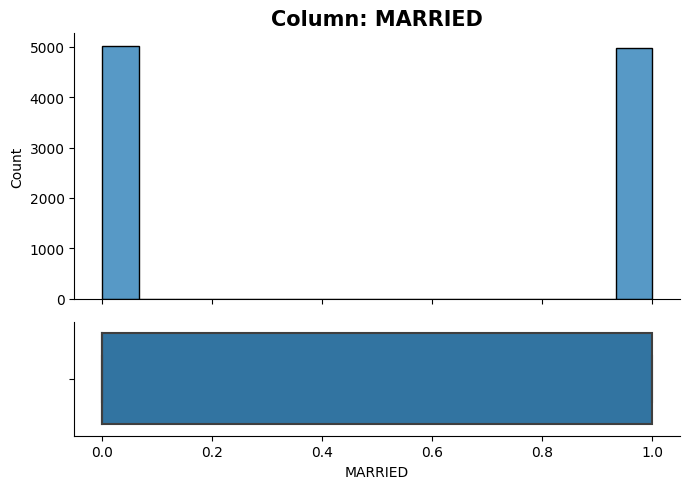

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 0.0 , occurs 5018 times (50.18%)
MARRIED: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'MARRIED',figsize=(7,5));

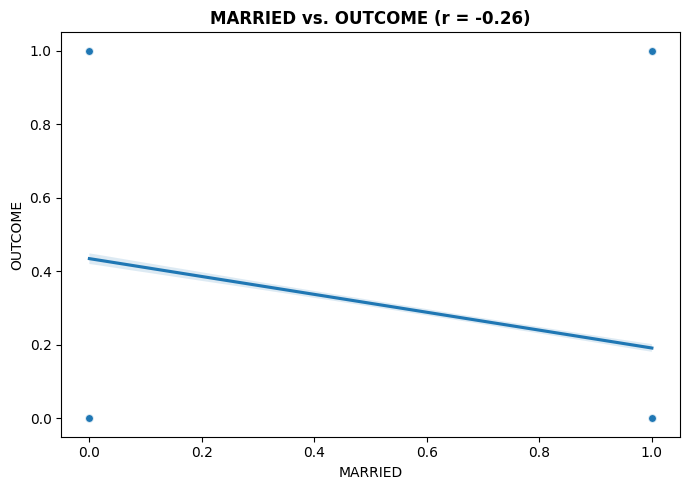

In [ ]:
plot_num_vs_target(car_df,'MARRIED',y=target);

##CHILDREN column

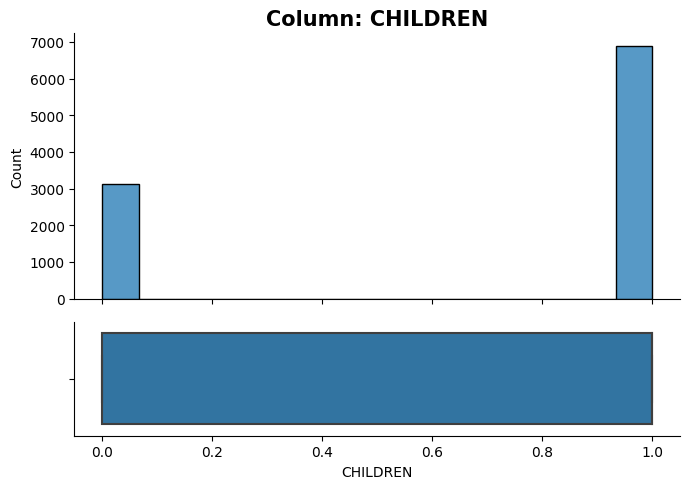

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 1.0 , occurs 6888 times (68.88%)
CHILDREN: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'CHILDREN',figsize=(7,5));

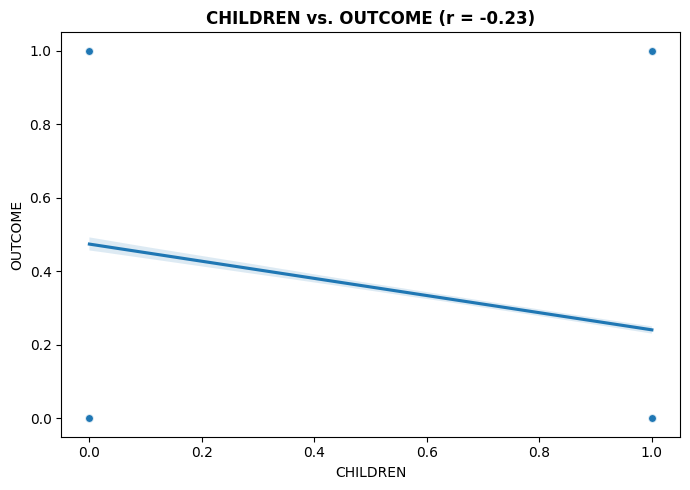

In [ ]:
plot_num_vs_target(car_df,'CHILDREN',y=target);

##POSTAL_CODE column

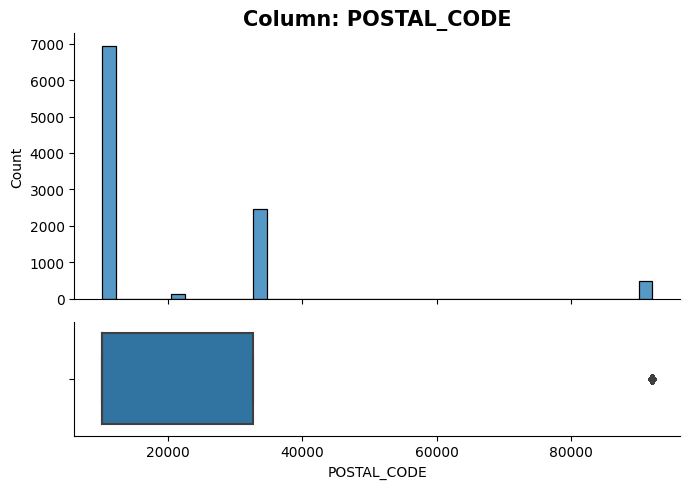

There is 0 NaN (0.0%)
There is 4 unique values
The most common value is 10238 , occurs 6940 times (69.4%)
POSTAL_CODE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'POSTAL_CODE',figsize=(7,5));

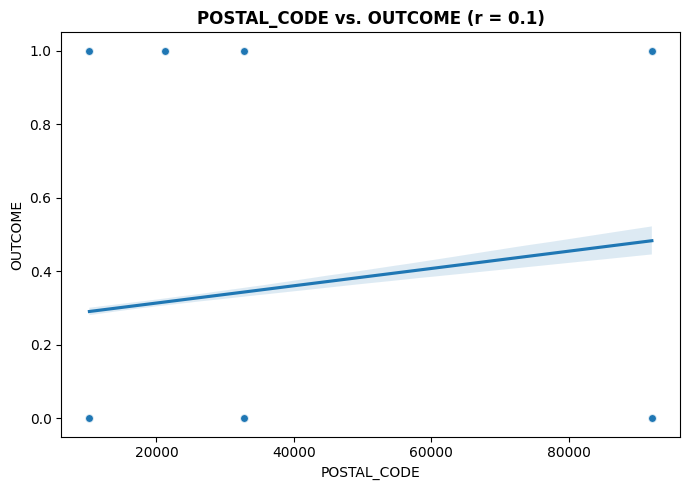

In [ ]:
plot_num_vs_target(car_df,'POSTAL_CODE',y=target);

##ANNUAL_MILEAGE column

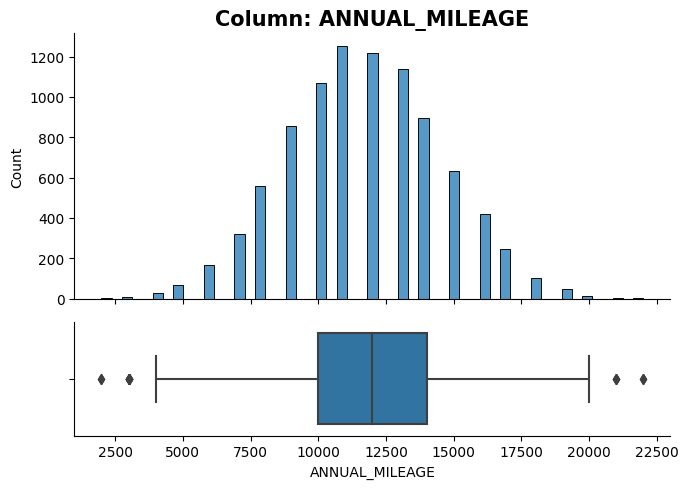

There is 957 NaN (9.57%)
There is 21 unique values
The most common value is 11000.0 , occurs 1253 times (12.53%)
ANNUAL_MILEAGE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'ANNUAL_MILEAGE',figsize=(7,5));

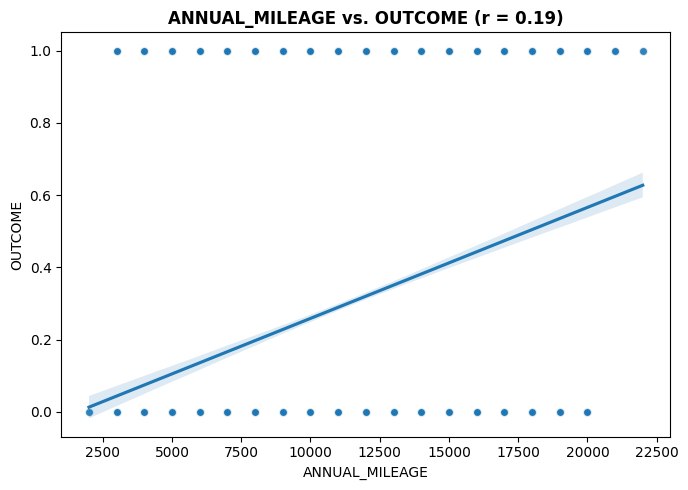

In [ ]:
plot_num_vs_target(car_df,'ANNUAL_MILEAGE',y=target);

The ANNUAL_MILEAGE column is a numerical feature with 9.57% of missing values so i'm going to impute with the median as a strategy.

##SPEEDING_VIOLATIONS column

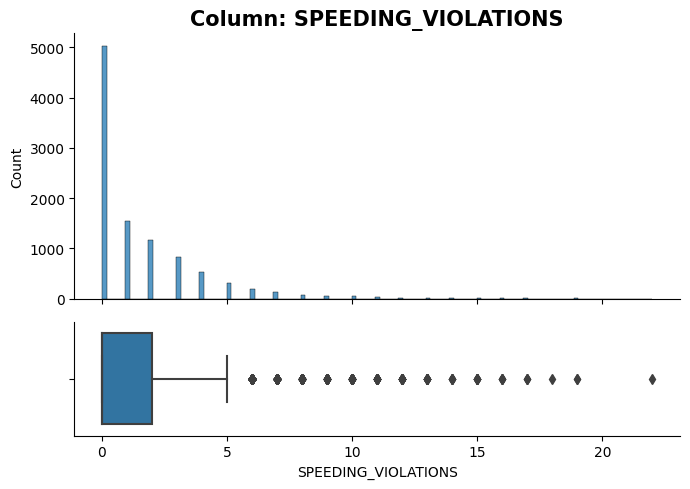

There is 0 NaN (0.0%)
There is 21 unique values
The most common value is 0 , occurs 5028 times (50.28%)
SPEEDING_VIOLATIONS: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'SPEEDING_VIOLATIONS',figsize=(7,5));

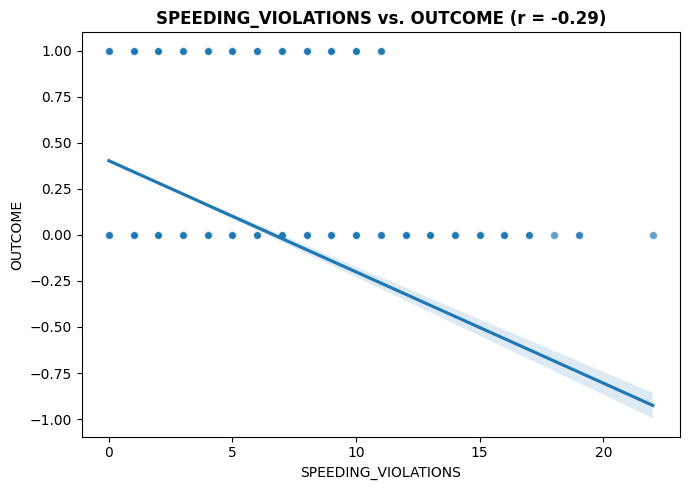

In [ ]:
plot_num_vs_target(car_df,'SPEEDING_VIOLATIONS',y=target);

##DUIS column

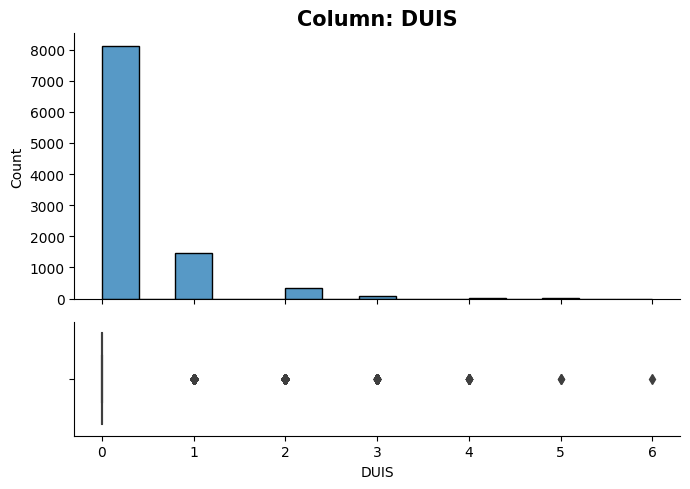

There is 0 NaN (0.0%)
There is 7 unique values
The most common value is 0 , occurs 8118 times (81.18%)
DUIS: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'DUIS',figsize=(7,5));

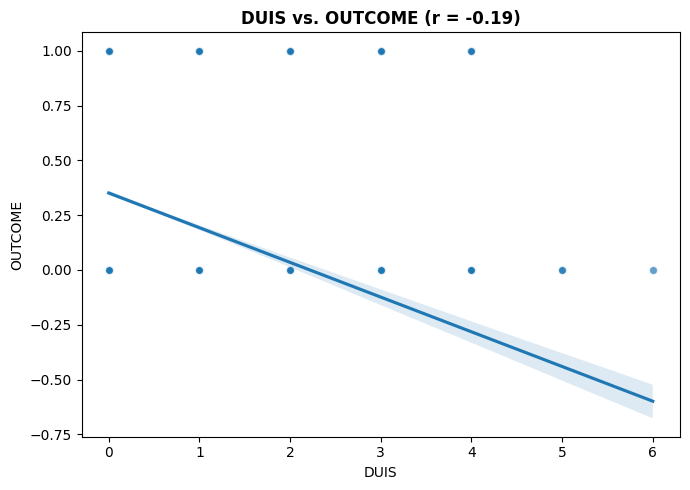

In [ ]:
plot_num_vs_target(car_df,'DUIS',y=target);

##PAST_ACCIDENTS column

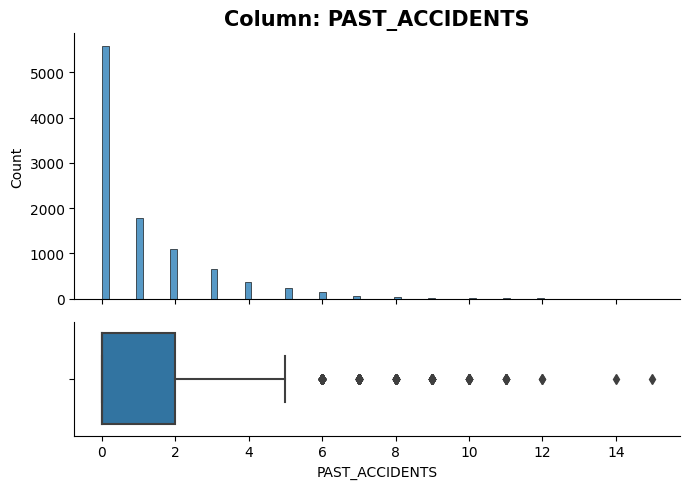

There is 0 NaN (0.0%)
There is 15 unique values
The most common value is 0 , occurs 5584 times (55.84%)
PAST_ACCIDENTS: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(car_df,'PAST_ACCIDENTS',figsize=(7,5));

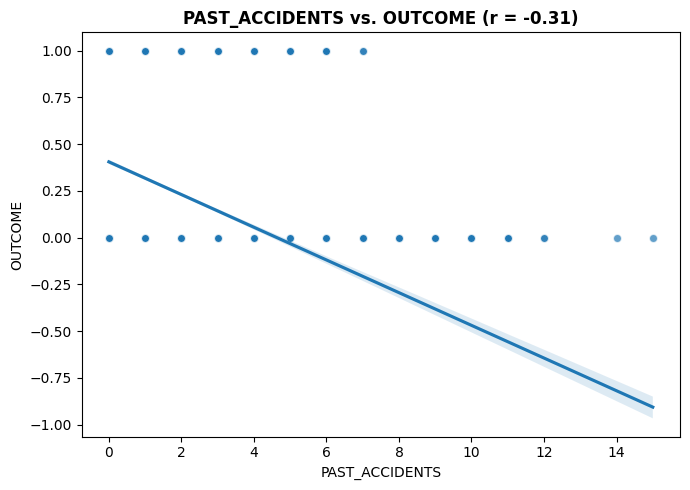

In [ ]:
plot_num_vs_target(car_df,'PAST_ACCIDENTS',y=target);

<ipython-input-33-3c04c146524d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car_df.corr()


<Axes: >

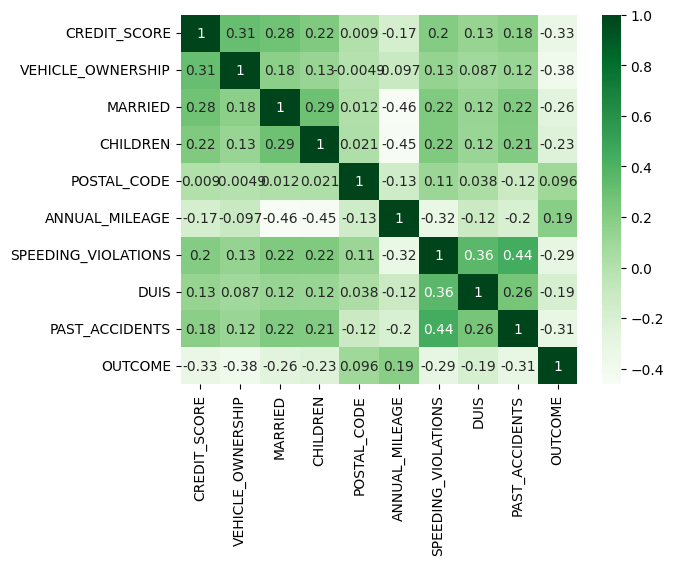

In [ ]:
corr = car_df.corr()
sns.heatmap(corr, cmap = 'Greens' , annot=True)


In [ ]:
car_df.describe().round(2)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.00,10000.00,10000.0,10000.00,10000.00,9043.00,10000.00,10000.00,10000.00,10000.00
mean,0.52,0.70,0.5,0.69,19864.55,11697.00,1.48,0.24,1.06,0.31
std,0.14,0.46,0.5,0.46,18915.61,2818.43,2.24,0.55,1.65,0.46
min,0.05,0.00,0.0,0.00,10238.00,2000.00,0.00,0.00,0.00,0.00
25%,0.42,0.00,0.0,0.00,10238.00,10000.00,0.00,0.00,0.00,0.00
50%,0.53,1.00,0.0,1.00,10238.00,12000.00,0.00,0.00,0.00,0.00
75%,0.62,1.00,1.0,1.00,32765.00,14000.00,2.00,0.00,2.00,1.00
max,0.96,1.00,1.0,1.00,92101.00,22000.00,22.00,6.00,15.00,1.00


In [ ]:
car_df.select_dtypes('object').columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

##AGE column

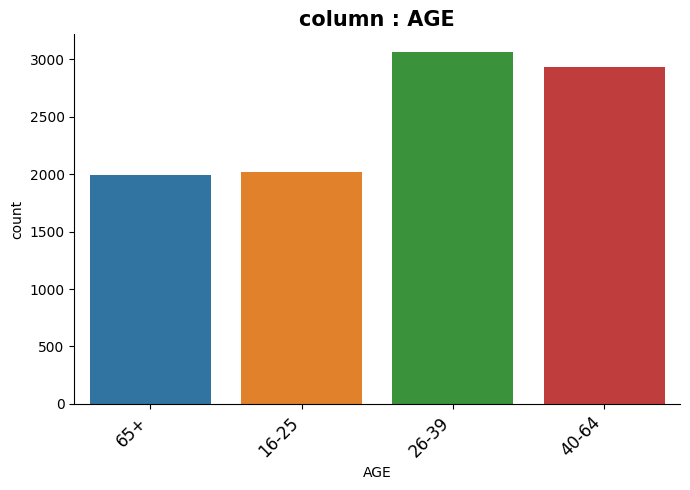

There is 0 NaN (0.0%)
There is 4 unique values
The most common value is 26-39 , occurs 3063 times (30.63%)
AGE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'AGE');

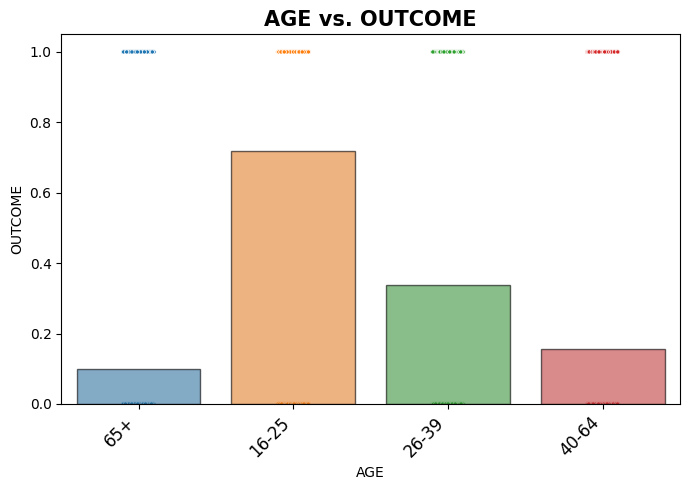

In [ ]:
plot_cat_vs_target(car_df,'AGE',y=target);

##GENDER column

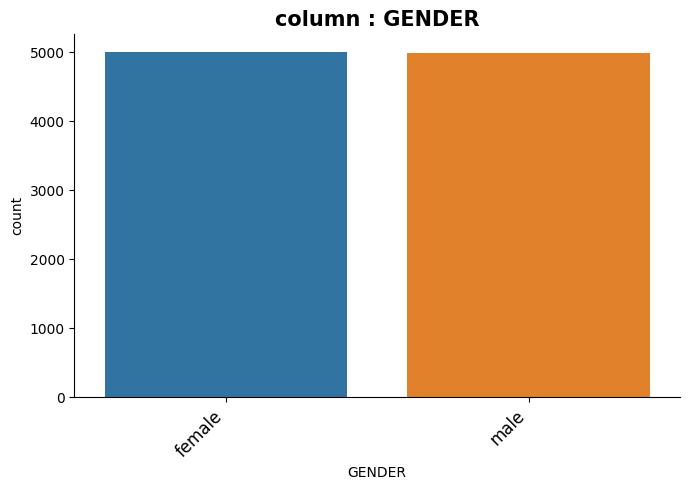

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is female , occurs 5010 times (50.1%)
GENDER: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'GENDER');

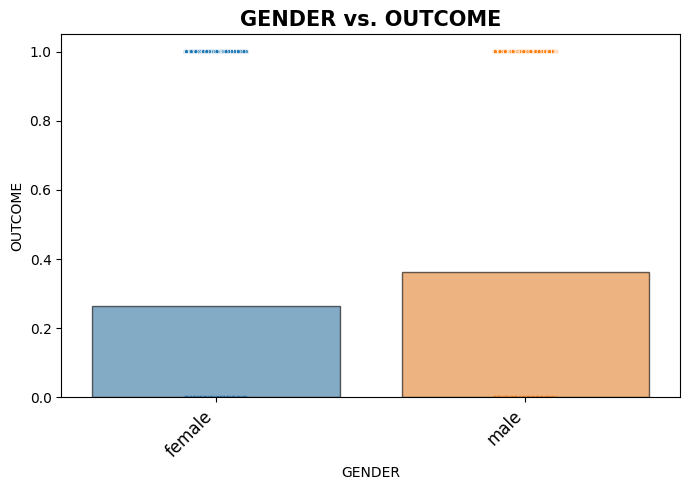

In [ ]:
plot_cat_vs_target(car_df,'GENDER',y=target);

##RACE column

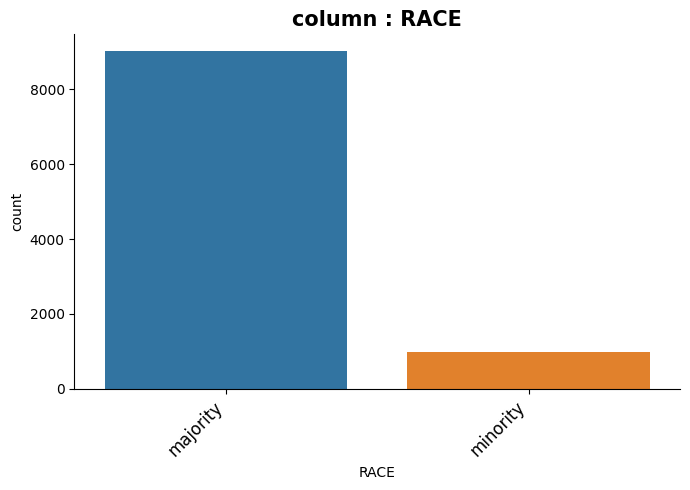

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is majority , occurs 9012 times (90.12%)
RACE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'RACE');

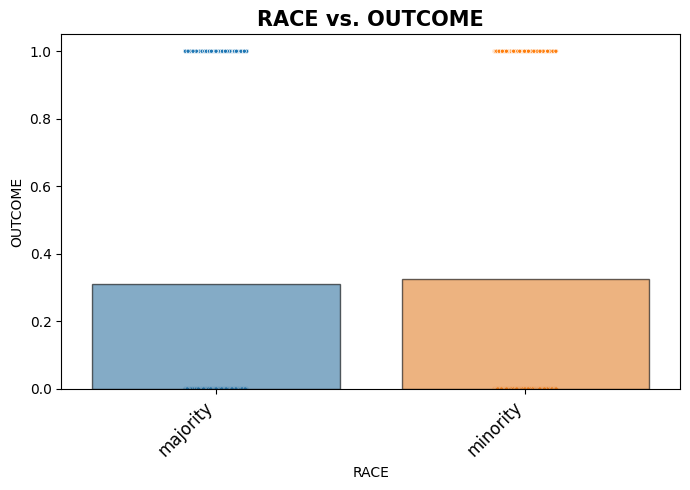

In [ ]:
plot_cat_vs_target(car_df,'RACE',y=target);

##DRIVING_EXPERIENCE column

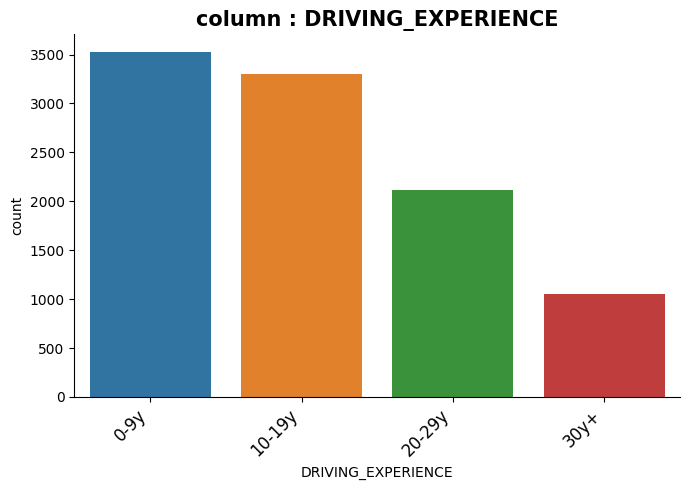

There is 0 NaN (0.0%)
There is 4 unique values
The most common value is 0-9y , occurs 3530 times (35.3%)
DRIVING_EXPERIENCE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'DRIVING_EXPERIENCE');

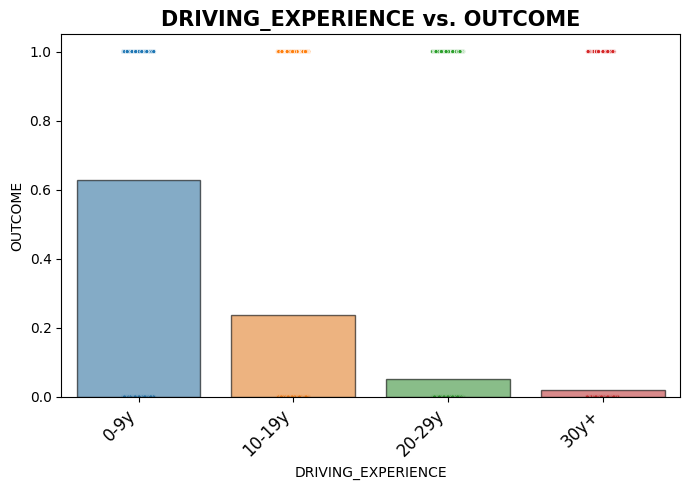

In [ ]:
plot_cat_vs_target(car_df,'DRIVING_EXPERIENCE',y=target);

##EDUCATION column

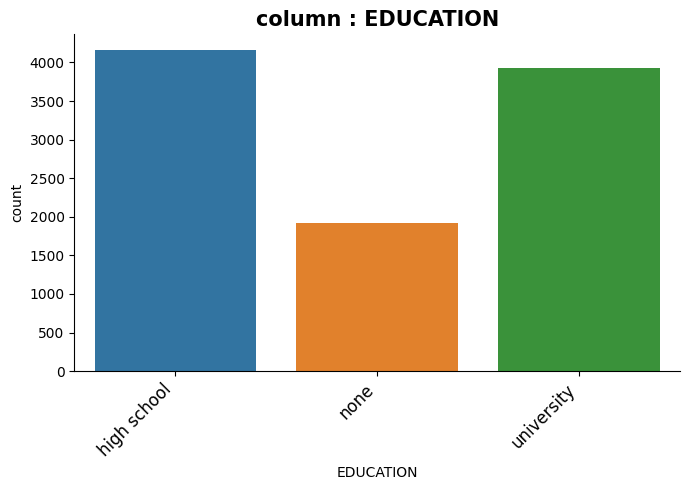

There is 0 NaN (0.0%)
There is 3 unique values
The most common value is high school , occurs 4157 times (41.57%)
EDUCATION: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'EDUCATION');

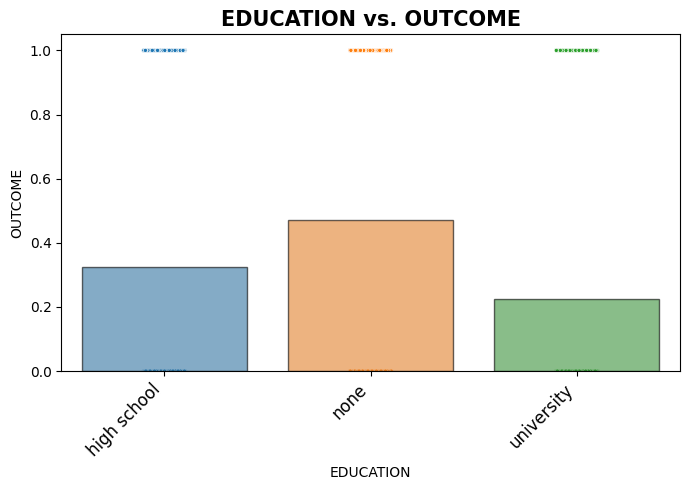

In [ ]:
plot_cat_vs_target(car_df,'EDUCATION',y=target);

##INCOME column

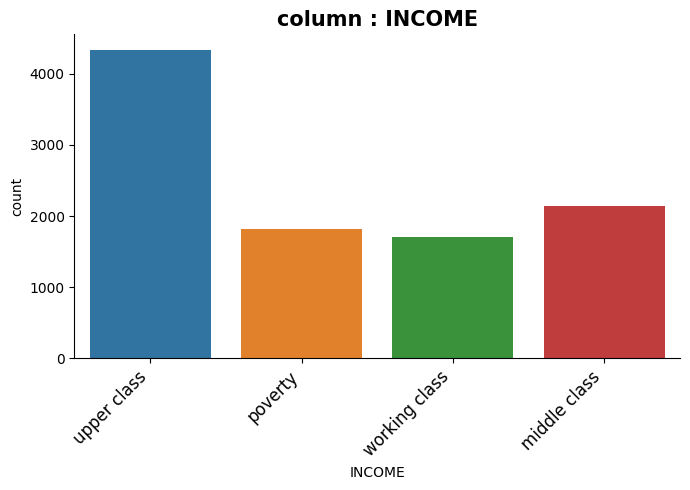

There is 0 NaN (0.0%)
There is 4 unique values
The most common value is upper class , occurs 4336 times (43.36%)
INCOME: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'INCOME');

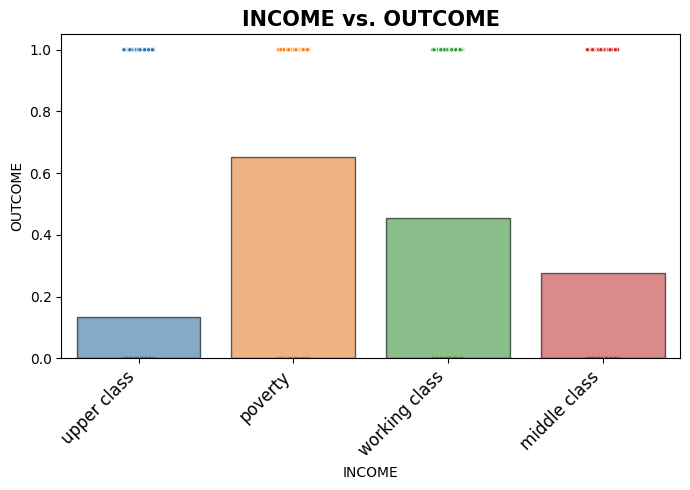

In [ ]:
plot_cat_vs_target(car_df,'INCOME',y=target);

##VEHICLE_YEAR column

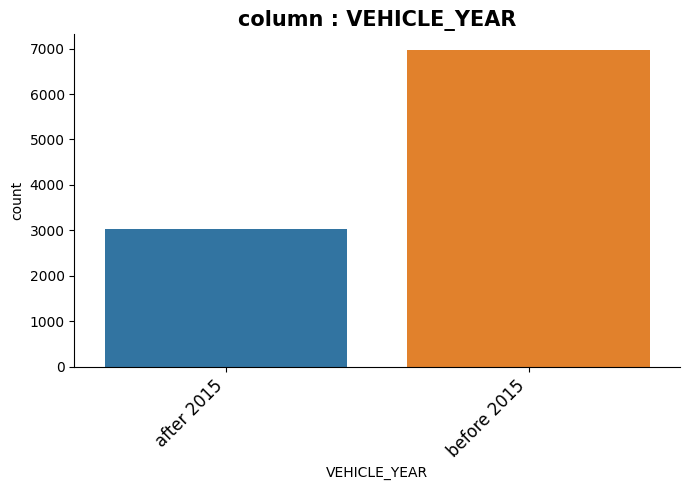

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is before 2015 , occurs 6967 times (69.67%)
VEHICLE_YEAR: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'VEHICLE_YEAR');

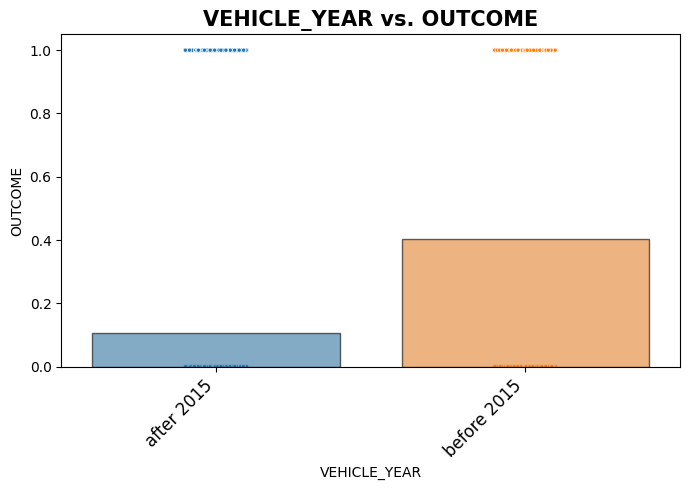

In [ ]:
plot_cat_vs_target(car_df,'VEHICLE_YEAR',y=target);

##VEHICLE_TYPE column

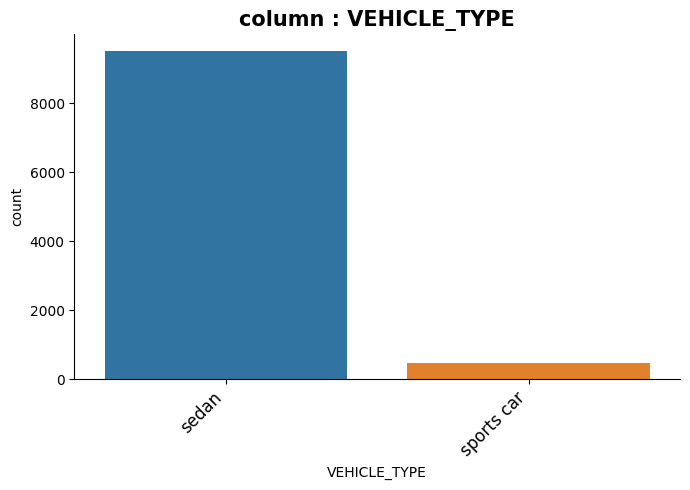

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is sedan , occurs 9523 times (95.23%)
VEHICLE_TYPE: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(car_df,'VEHICLE_TYPE');

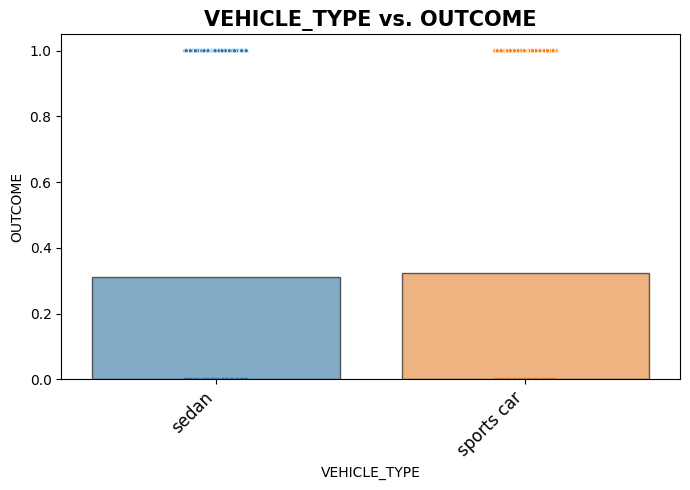

In [ ]:
plot_cat_vs_target(car_df,'VEHICLE_TYPE',y=target);

#Stroke Data

In [ ]:
stroke_df.info()
stroke_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#1. Source of data

https://www.kaggle.com/

#2. Brief description of data

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#3. What is the target?

Our target is the column : stroke.

#4. What does one row represent? (A person? A business? An event? A product?)

Each row represent a patient with a potential stroke.


#5. Is this a classification or regression problem?

Classification problem.

#6. How many features does the data have?

11 feautres and our target .

#7. How many rows are in the dataset?

5110 rows .

#8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

I'm going to check for duplicated rows and the null values/missing data and explore them and then i'm going to check the balance of our target so it can help me with my model.

In [ ]:
stroke_df.duplicated().sum()

0

In [ ]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

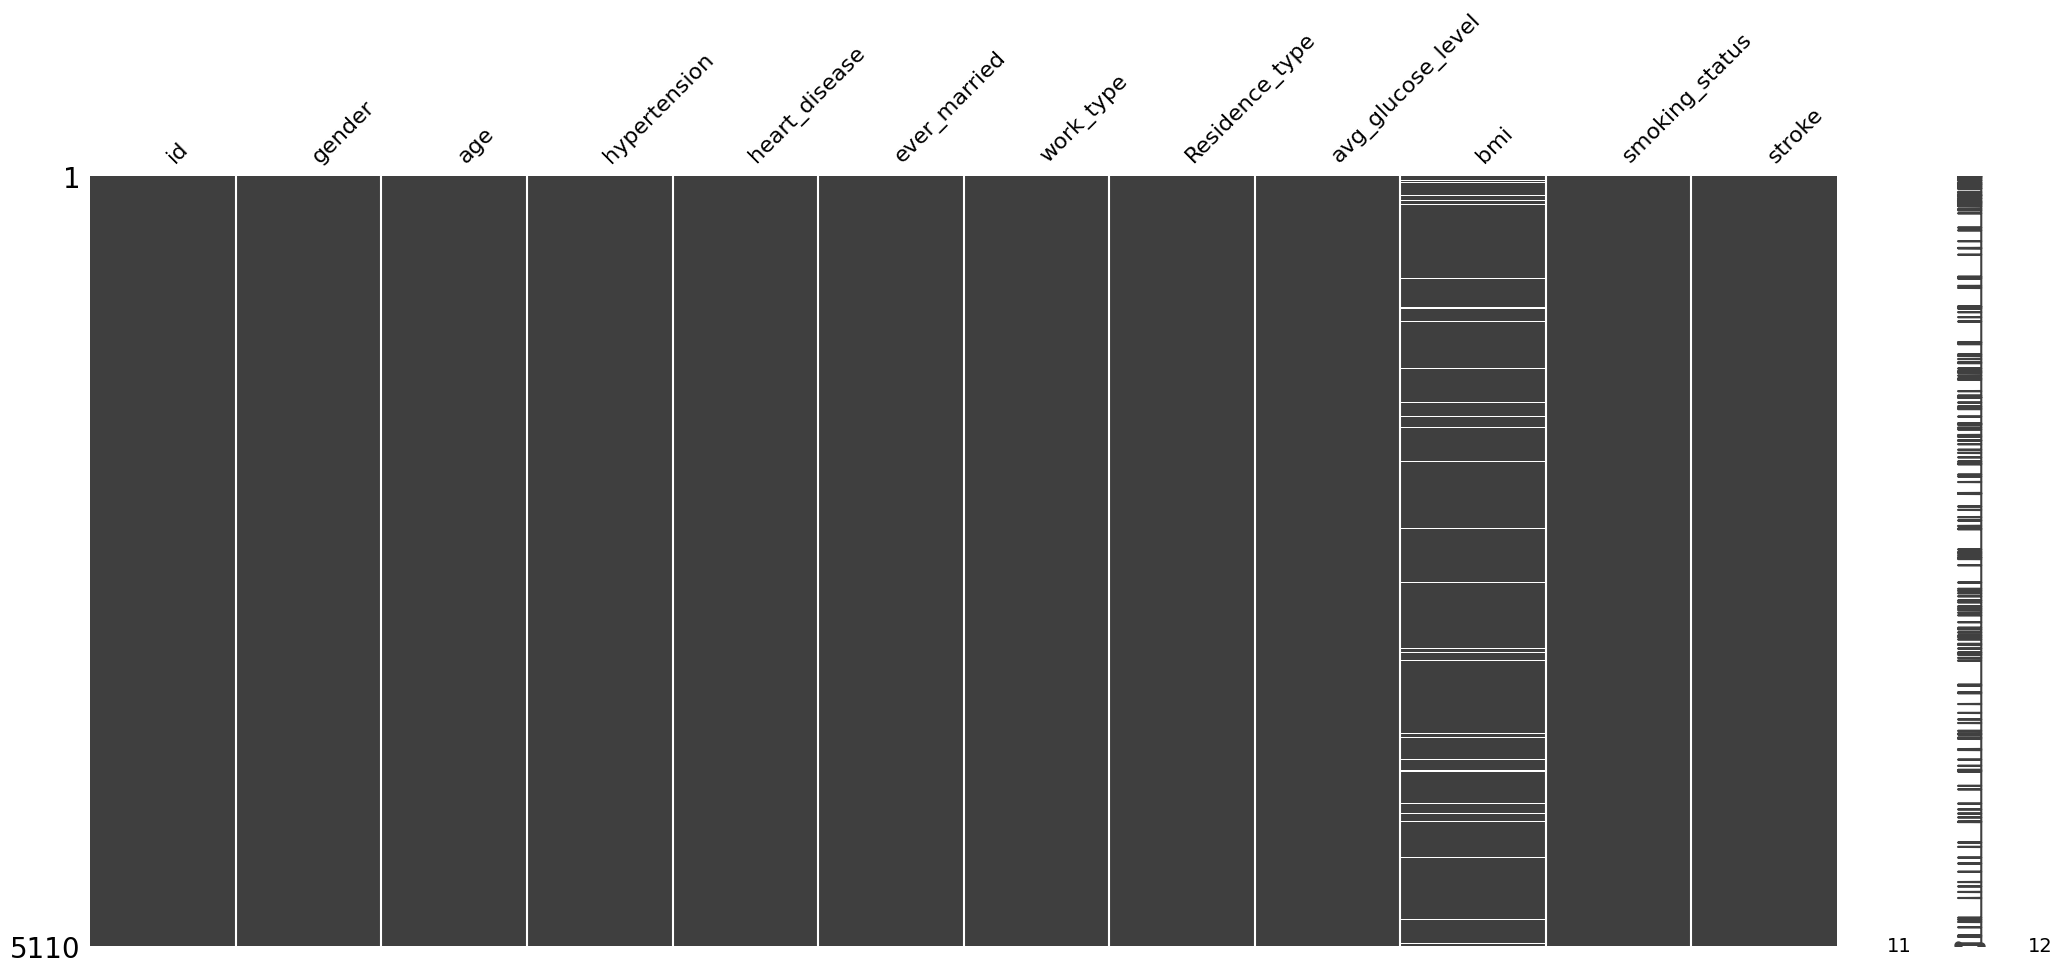

In [ ]:
msno.matrix(stroke_df)

In [ ]:
stroke_df['id'].value_counts().sum()/len(stroke_df)

1.0

In [ ]:
#let's change the index of our data
stroke_df = stroke_df.set_index('id')
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Target column

In [ ]:
target1 = 'stroke'
stroke_df[target1].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

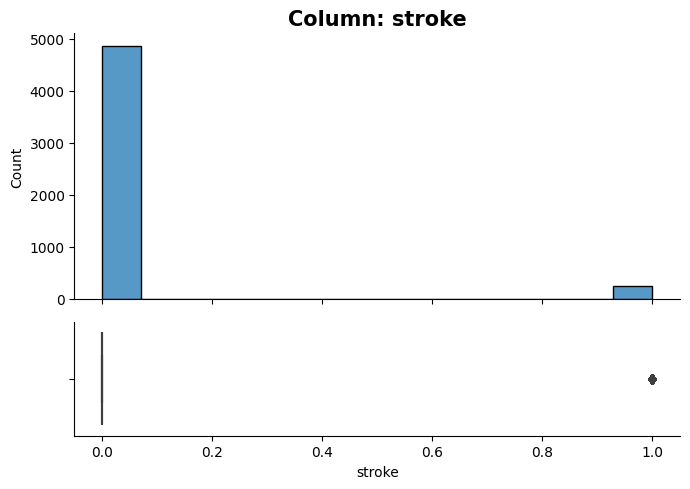

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 0 , occurs 4861 times (95.13%)
stroke: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,target1,figsize=(7,5));

In [ ]:
stroke_df.select_dtypes('object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

##gender column

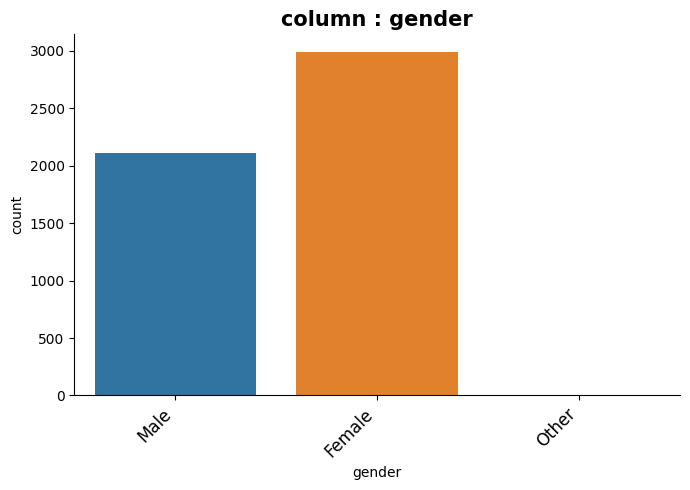

There is 0 NaN (0.0%)
There is 3 unique values
The most common value is Female , occurs 2994 times (58.59%)
gender: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(stroke_df,'gender');

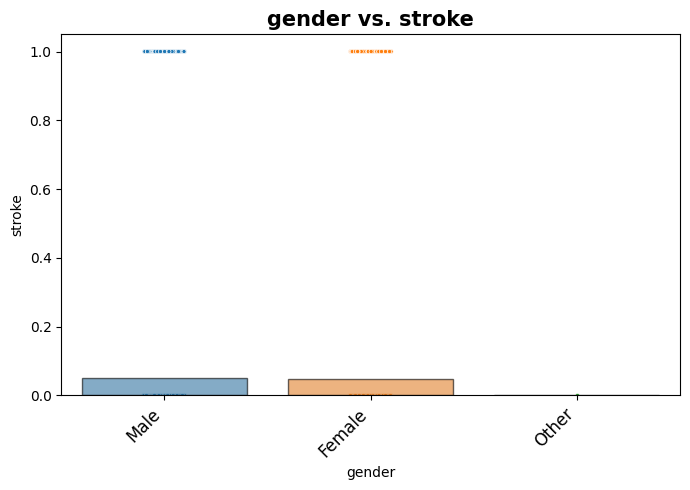

In [ ]:
plot_cat_vs_target(stroke_df,'gender',y=target1);

##ever_married column

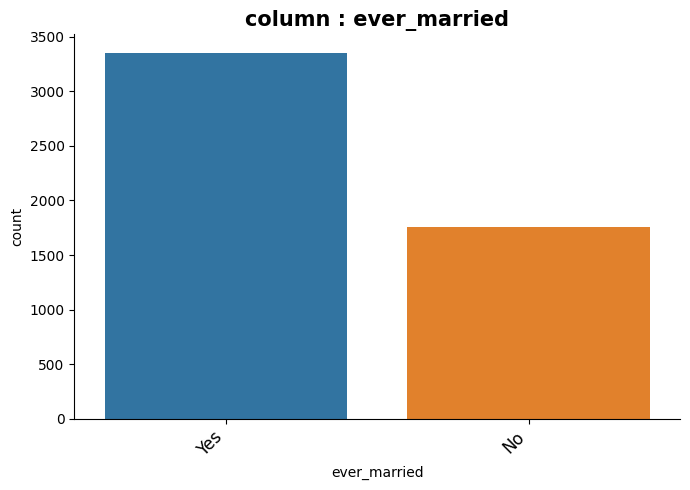

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is Yes , occurs 3353 times (65.62%)
ever_married: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(stroke_df,'ever_married');

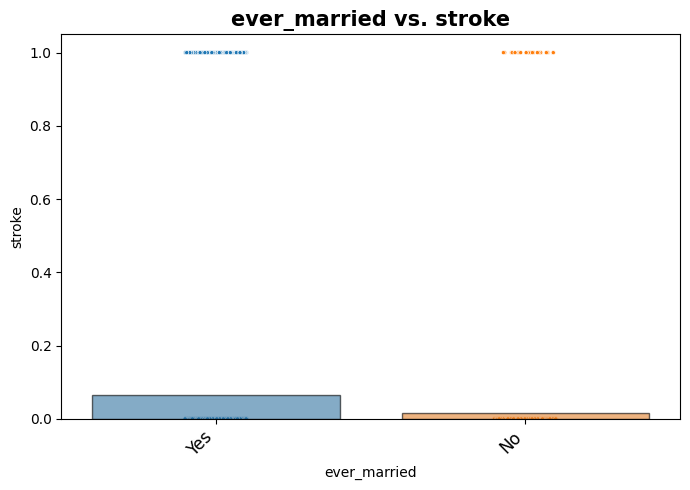

In [ ]:
plot_cat_vs_target(stroke_df,'ever_married',y=target1);

##work_type column

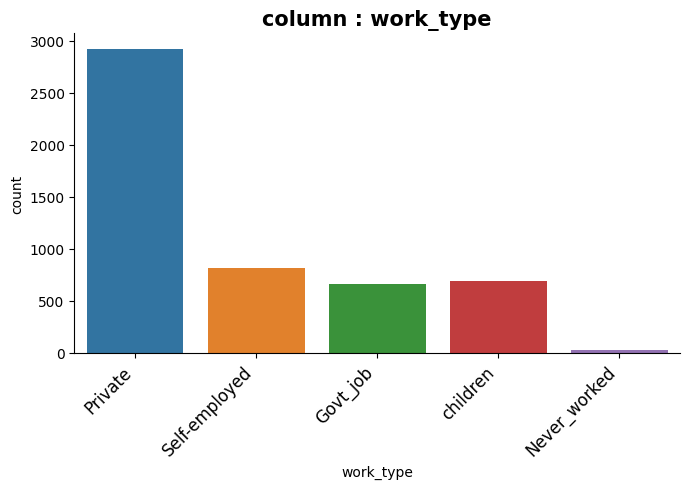

There is 0 NaN (0.0%)
There is 5 unique values
The most common value is Private , occurs 2925 times (57.24%)
work_type: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(stroke_df,'work_type');

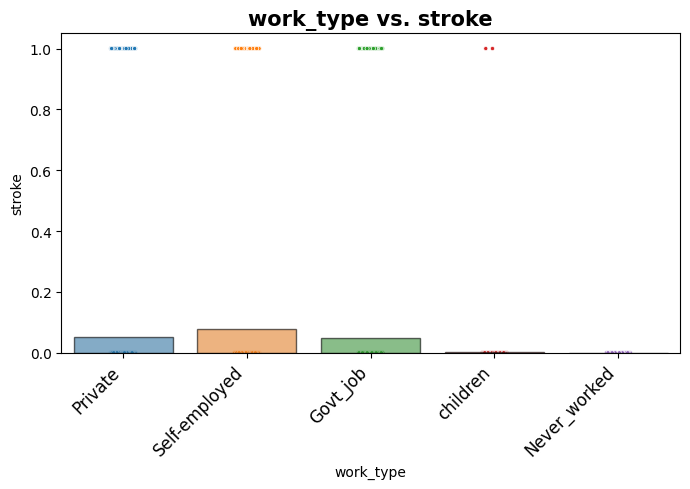

In [ ]:
plot_cat_vs_target(stroke_df,'work_type',y=target1);

##Residence_type column

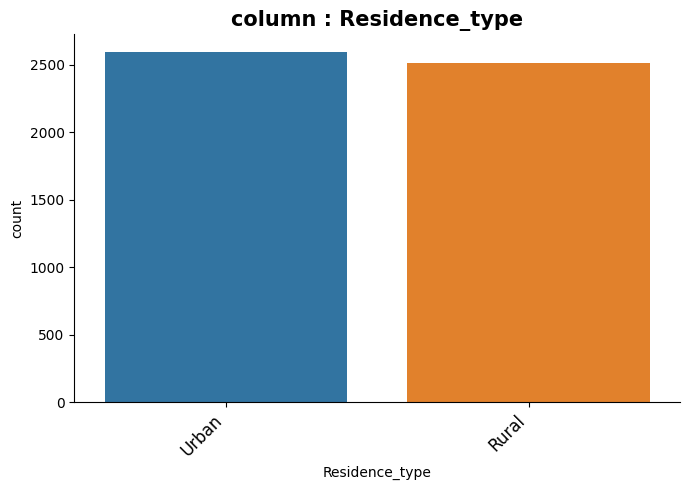

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is Urban , occurs 2596 times (50.8%)
Residence_type: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(stroke_df,'Residence_type');

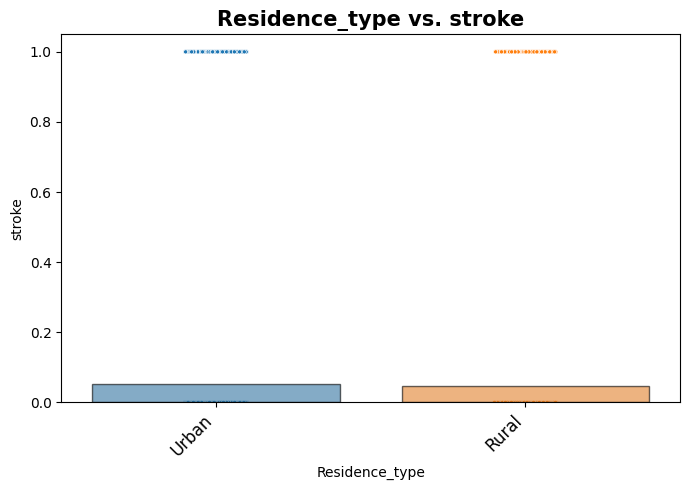

In [ ]:
plot_cat_vs_target(stroke_df,'Residence_type',y=target1);

##smoking_status column

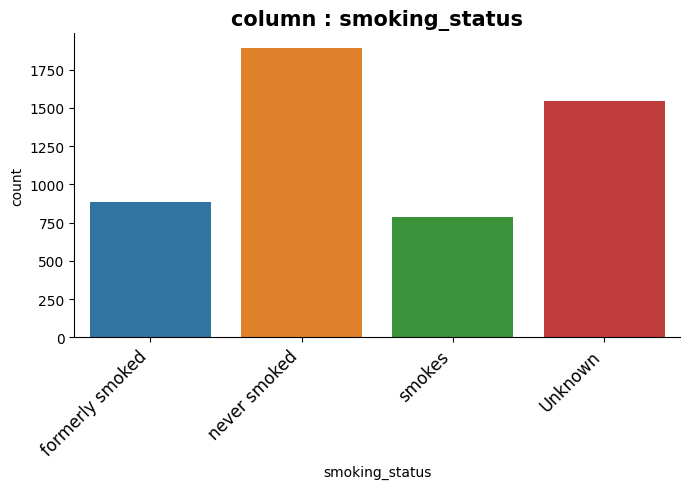

There is 0 NaN (0.0%)
There is 4 unique values
The most common value is never smoked , occurs 1892 times (37.03%)
smoking_status: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_cat(stroke_df,'smoking_status');

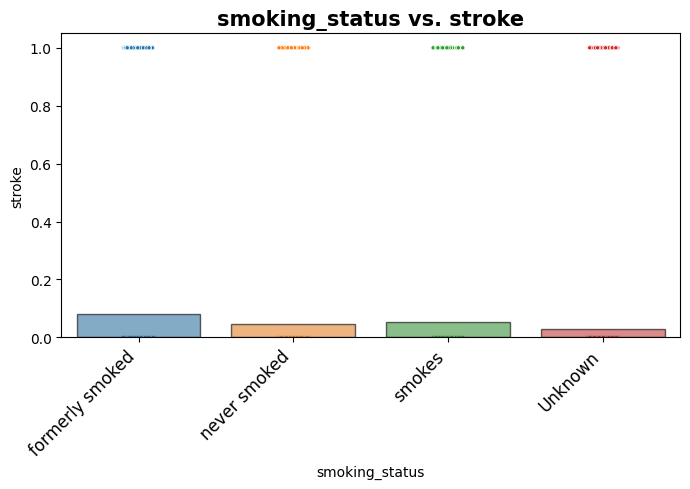

In [ ]:
plot_cat_vs_target(stroke_df,'smoking_status',y=target1);

In [ ]:
stroke_df.select_dtypes('number').columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

##age column

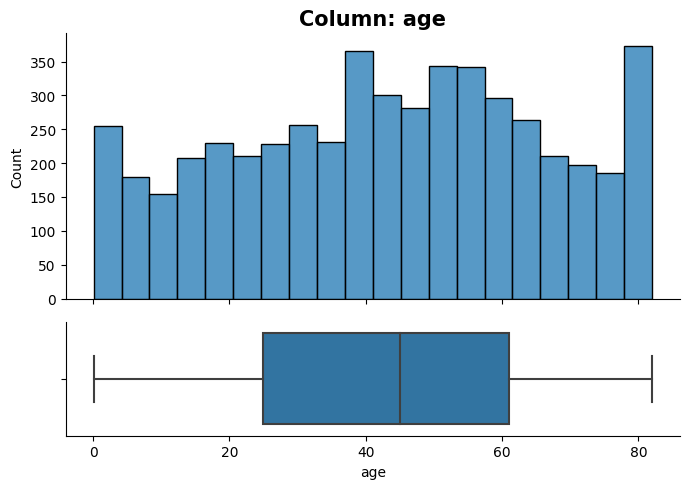

There is 0 NaN (0.0%)
There is 104 unique values
The most common value is 78.0 , occurs 102 times (2.0%)
age: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,'age',figsize=(7,5));

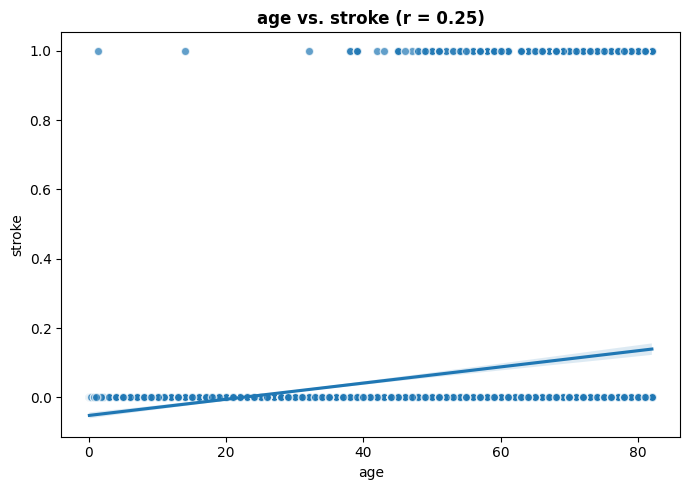

In [ ]:
plot_num_vs_target(stroke_df,'age',y=target1);

##hypertension column

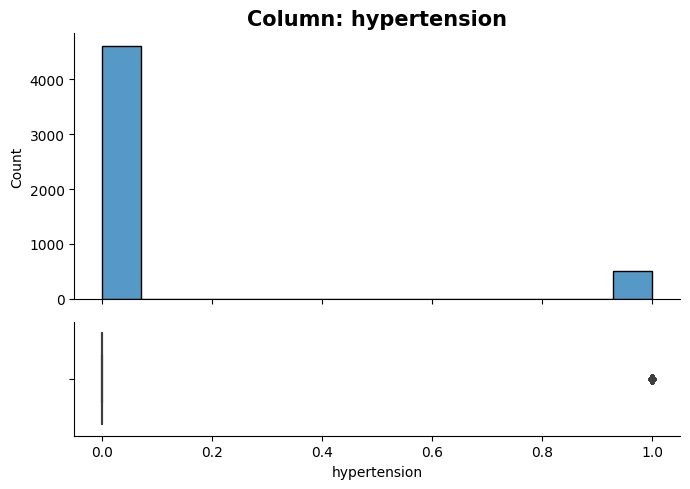

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 0 , occurs 4612 times (90.25%)
hypertension: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,'hypertension',figsize=(7,5));

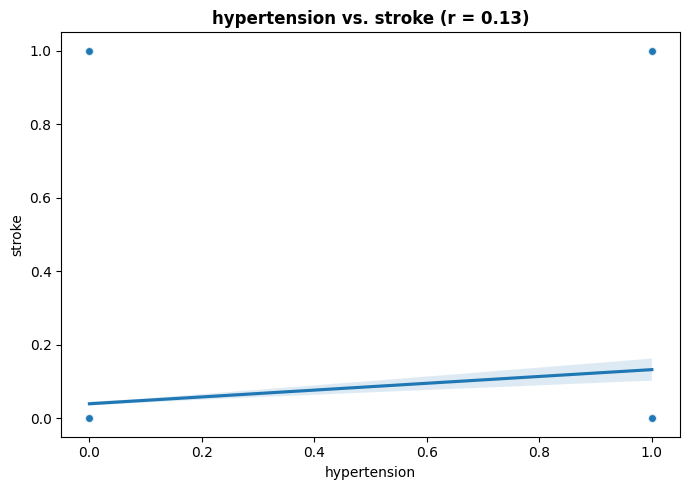

In [ ]:
plot_num_vs_target(stroke_df,'hypertension',y=target1);

##heart_disease column

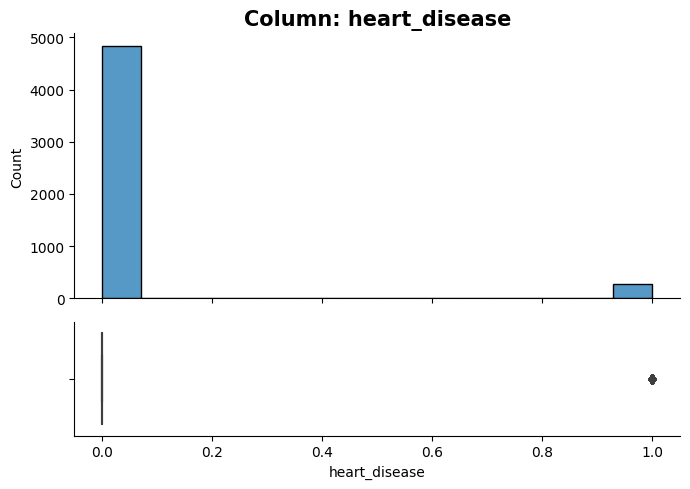

There is 0 NaN (0.0%)
There is 2 unique values
The most common value is 0 , occurs 4834 times (94.6%)
heart_disease: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,'heart_disease',figsize=(7,5));

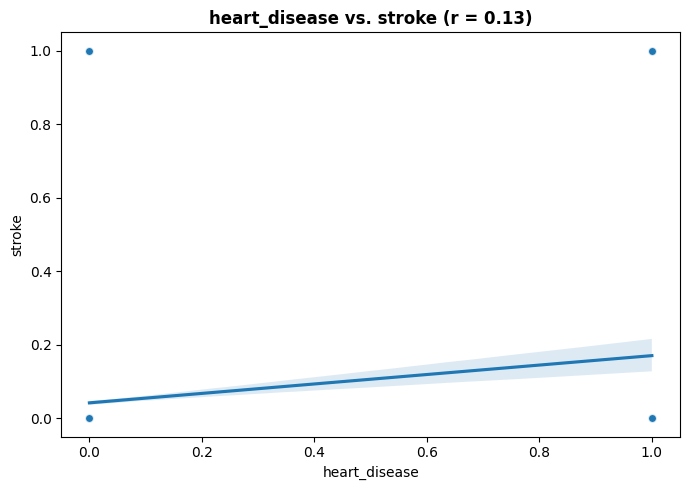

In [ ]:
plot_num_vs_target(stroke_df,'heart_disease',y=target1);

##avg_glucose_level column

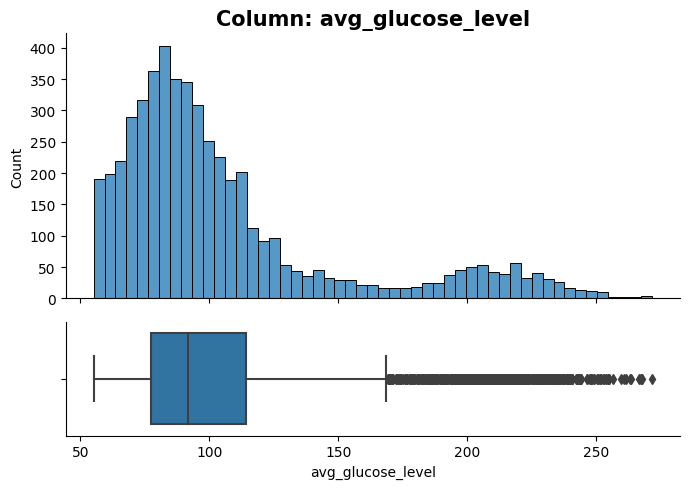

There is 0 NaN (0.0%)
There is 3979 unique values
The most common value is 93.88 , occurs 6 times (0.12%)
avg_glucose_level: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,'avg_glucose_level',figsize=(7,5));

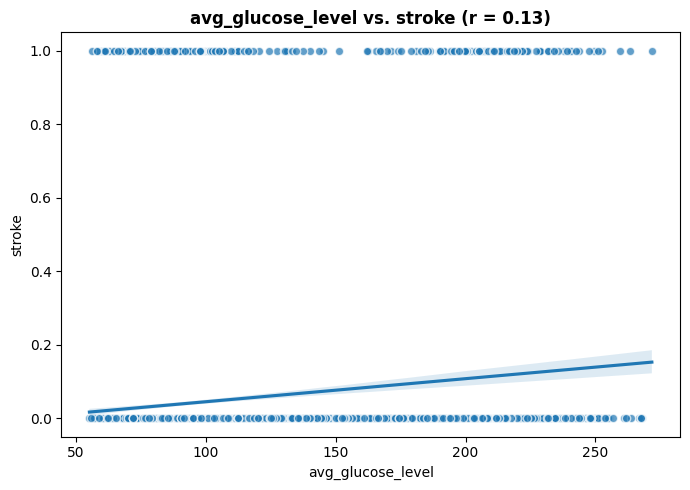

In [ ]:
plot_num_vs_target(stroke_df,'avg_glucose_level',y=target1);

##bmi column

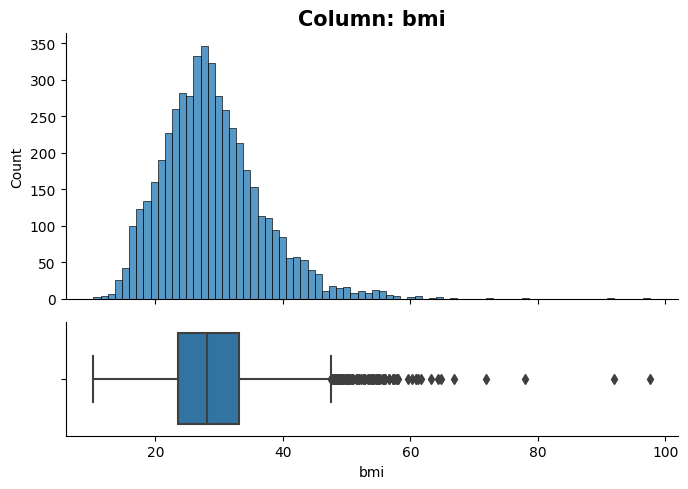

There is 201 NaN (3.93%)
There is 418 unique values
The most common value is nan , occurs 201 times (3.93%)
bmi: is neither constant or a quasi-constant feauture and should be kept


In [ ]:
explore_num(stroke_df,'bmi',figsize=(7,5));

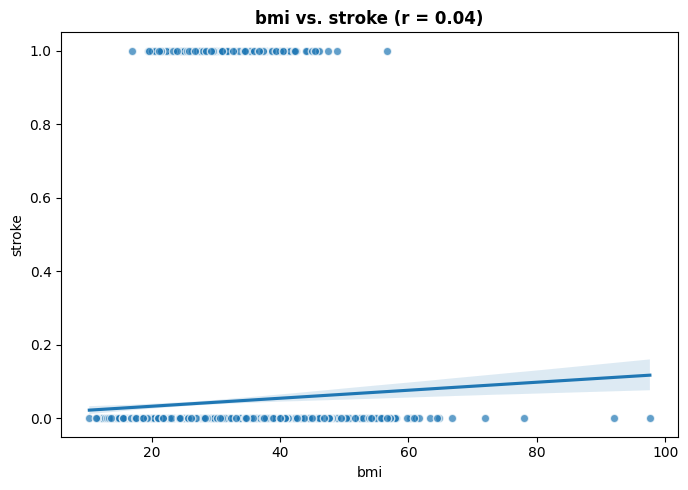

In [ ]:
plot_num_vs_target(stroke_df,'bmi',y=target1);

bmi is a numerical feature and it has missing values , so for the imputation i will use the median strategy.

<ipython-input-88-cc10ffe11211>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = stroke_df.corr()


<Axes: >

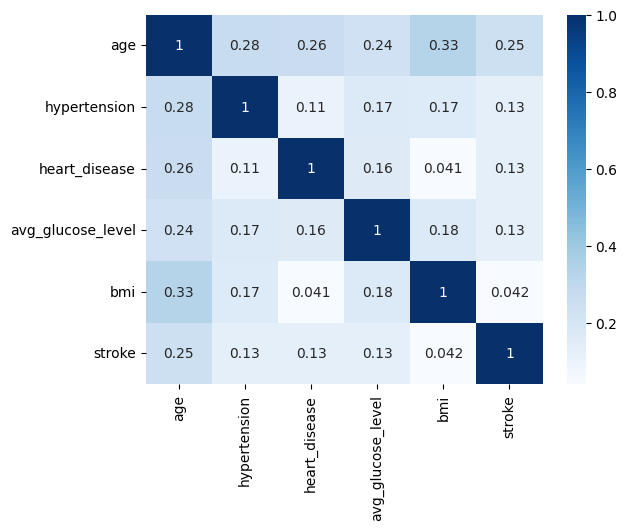

In [ ]:
cor = stroke_df.corr()
sns.heatmap(cor, cmap = 'Blues' , annot=True)

In [ ]:
stroke_df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00
